### Data Visualization IS445 (Spring 2024) Final Project - Individual

##### Name of dataset: NFL 2019 play by play data
Dataset link: https://nflsavant.com

Dataset download: https://nflsavant.com/pbp_data.php?year=2019

License: NFLsavant.com’s data is freely and openly available to anyone in public. There is no cost to access and use the data.
    
Size:  pbp-2019.csv is 9.18 MB


##### Characteristics of this dataset:
NFLsavant.com is a web site dedicated to providing advanced NFL statistics in a simple to use interface. All data and stats from this site are compiled from publicly-available NFL play-by-play data on the internet. There are 42,187 rows by 41 columns in the 2019 file. The data consists of strings and numbers.

##### My experience with the dataset:
Initially, I took and started working with the 2023 regular season file. That file was roughly 39K rows and 45 columns. After playing with the data, I discovered that it was incomplete. I assumed that all 272 games were accounted for but learned that the data stopped at Week 14. So, there were 64 games missing from the 2023 statistics. I went back to NFLsavant.com and found that the 2019 season was the most recent complete season featuring 256 games. The thing I like about playing with this data, was that I could confirm different facts online. I noticed 2023 was incomplete when I couldn’t find the Dallas Cowboys longest pass play from Week 17. 


In [1]:
# These first couple of graphs were to see how I could break off a smaller chunk and play around. I need to first add a few columns based on the 
# given data the game was played. I thought it would be useful to organize the data a few ways by: Team, day of the week, month of the year, quarter in the game, down in a series.

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# redo the file location of the input data

nflseason = pd.read_csv(r'C:\Users\andre\Downloads\pbp-2019.csv')

In [3]:
nflseason

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
0,2019122201,2019-12-22,4,1,40,LAC,LV,3,9,91,...,0,0,NaN,9,OPP,0,NaN,0,NaN,0
1,2019122201,2019-12-22,4,1,47,LAC,LV,2,9,91,...,0,0,NaN,9,OPP,0,NaN,0,NaN,0
2,2019122201,2019-12-22,4,1,51,LAC,LV,1,9,91,...,0,0,NaN,9,OPP,0,NaN,0,NaN,0
3,2019122201,2019-12-22,4,1,57,LAC,LV,2,2,86,...,0,0,NaN,14,OPP,1,OAK,1,DEFENSIVE OFFSIDE,5
4,2019122201,2019-12-22,4,2,3,LAC,LV,1,10,78,...,0,0,NaN,22,OPP,0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42181,2019090803,2019-09-08,4,0,0,NaN,BAL,0,0,0,...,0,0,NaN,0,OWN,0,NaN,0,NaN,0
42182,2019090803,2019-09-08,3,7,54,BAL,MIA,0,0,35,...,0,0,NaN,35,OWN,0,NaN,0,NaN,0
42183,2019090800,2019-09-08,1,0,0,NaN,LA,0,0,0,...,0,0,NaN,0,OWN,0,NaN,0,NaN,0
42184,2019090500,2019-09-05,3,15,0,GB,CHI,0,0,35,...,0,0,NaN,35,OWN,0,NaN,0,NaN,0


In [4]:
df = pd.DataFrame(nflseason)

In [5]:
# Convert the column to datetime and add columns for day of the week and month that the game was played
df['GameDate'] = pd.to_datetime(df['GameDate'])
df['DayOfWeek'] = df['GameDate'].dt.strftime('%a')
df['Month'] = df['GameDate'].dt.strftime('%b')

# Delete rows where the play did not occur because of a TIMEOUT or END QUARTER
indexYardLine = df[(df['YardLine'] == 0)].index
df.drop(indexYardLine, inplace=True)

indexDown = df[(df['Down'] == 0)].index
df.drop(indexDown, inplace=True)

# Delete rows where there wasn't a play that generated yardage
indexPlayType = df[(df['PlayType'] == 'CLOCK STOP') | (df['PlayType'] == 'EXCEPTION') | (df['PlayType'] == 'EXTRA POINT') | (df['PlayType'] == 'FIELD GOAL') | (df['PlayType'] == 'FUMBLES') | (df['PlayType'] == 'KICK OFF')  | (df['PlayType'] == 'TWO-POINT CONVERSION') | (df['PlayType'] == 'NO PLAY')   | (df['PlayType'] == 'TIMEOUT')| (df['PlayType'] == 'PENALTY')| (df['PlayType'] == 'QB KNEEL') | (df['PlayType'] == 'PUNT')].index
df.drop(indexPlayType, inplace=True)


OffenseTeam   ARI   ATL   BAL   BUF   CAR   CHI   CIN   CLE   DAL   DEN  ...  \
PlayType                                                                 ...   
PASS         3716  5035  3426  3215  4144  3733  4208  4161  4960  3427  ...   
RUSH         1828  1190  2352  1667  1739  1218  1291  1729  1901  1583  ...   
SACK         -320  -337  -116  -228  -458  -273  -331  -267  -153  -279  ...   
SCRAMBLE      243   161   399   315   123   122   114   105   133    94  ...   

OffenseTeam    NO   NYG   NYJ   PHI   PIT   SEA    SF    TB   TEN   WAS  
PlayType                                                                 
PASS         4375  4129  3772  3992  3484  4155  3844  5115  4121  3325  
RUSH         1631  1340  1182  1771  1032  1814  2100  1185  1850  1483  
SACK         -200  -325  -328  -231  -223  -323  -223  -295  -392  -399  
SCRAMBLE      108   221    89   163   129   342    73   231   235   109  

[4 rows x 32 columns]


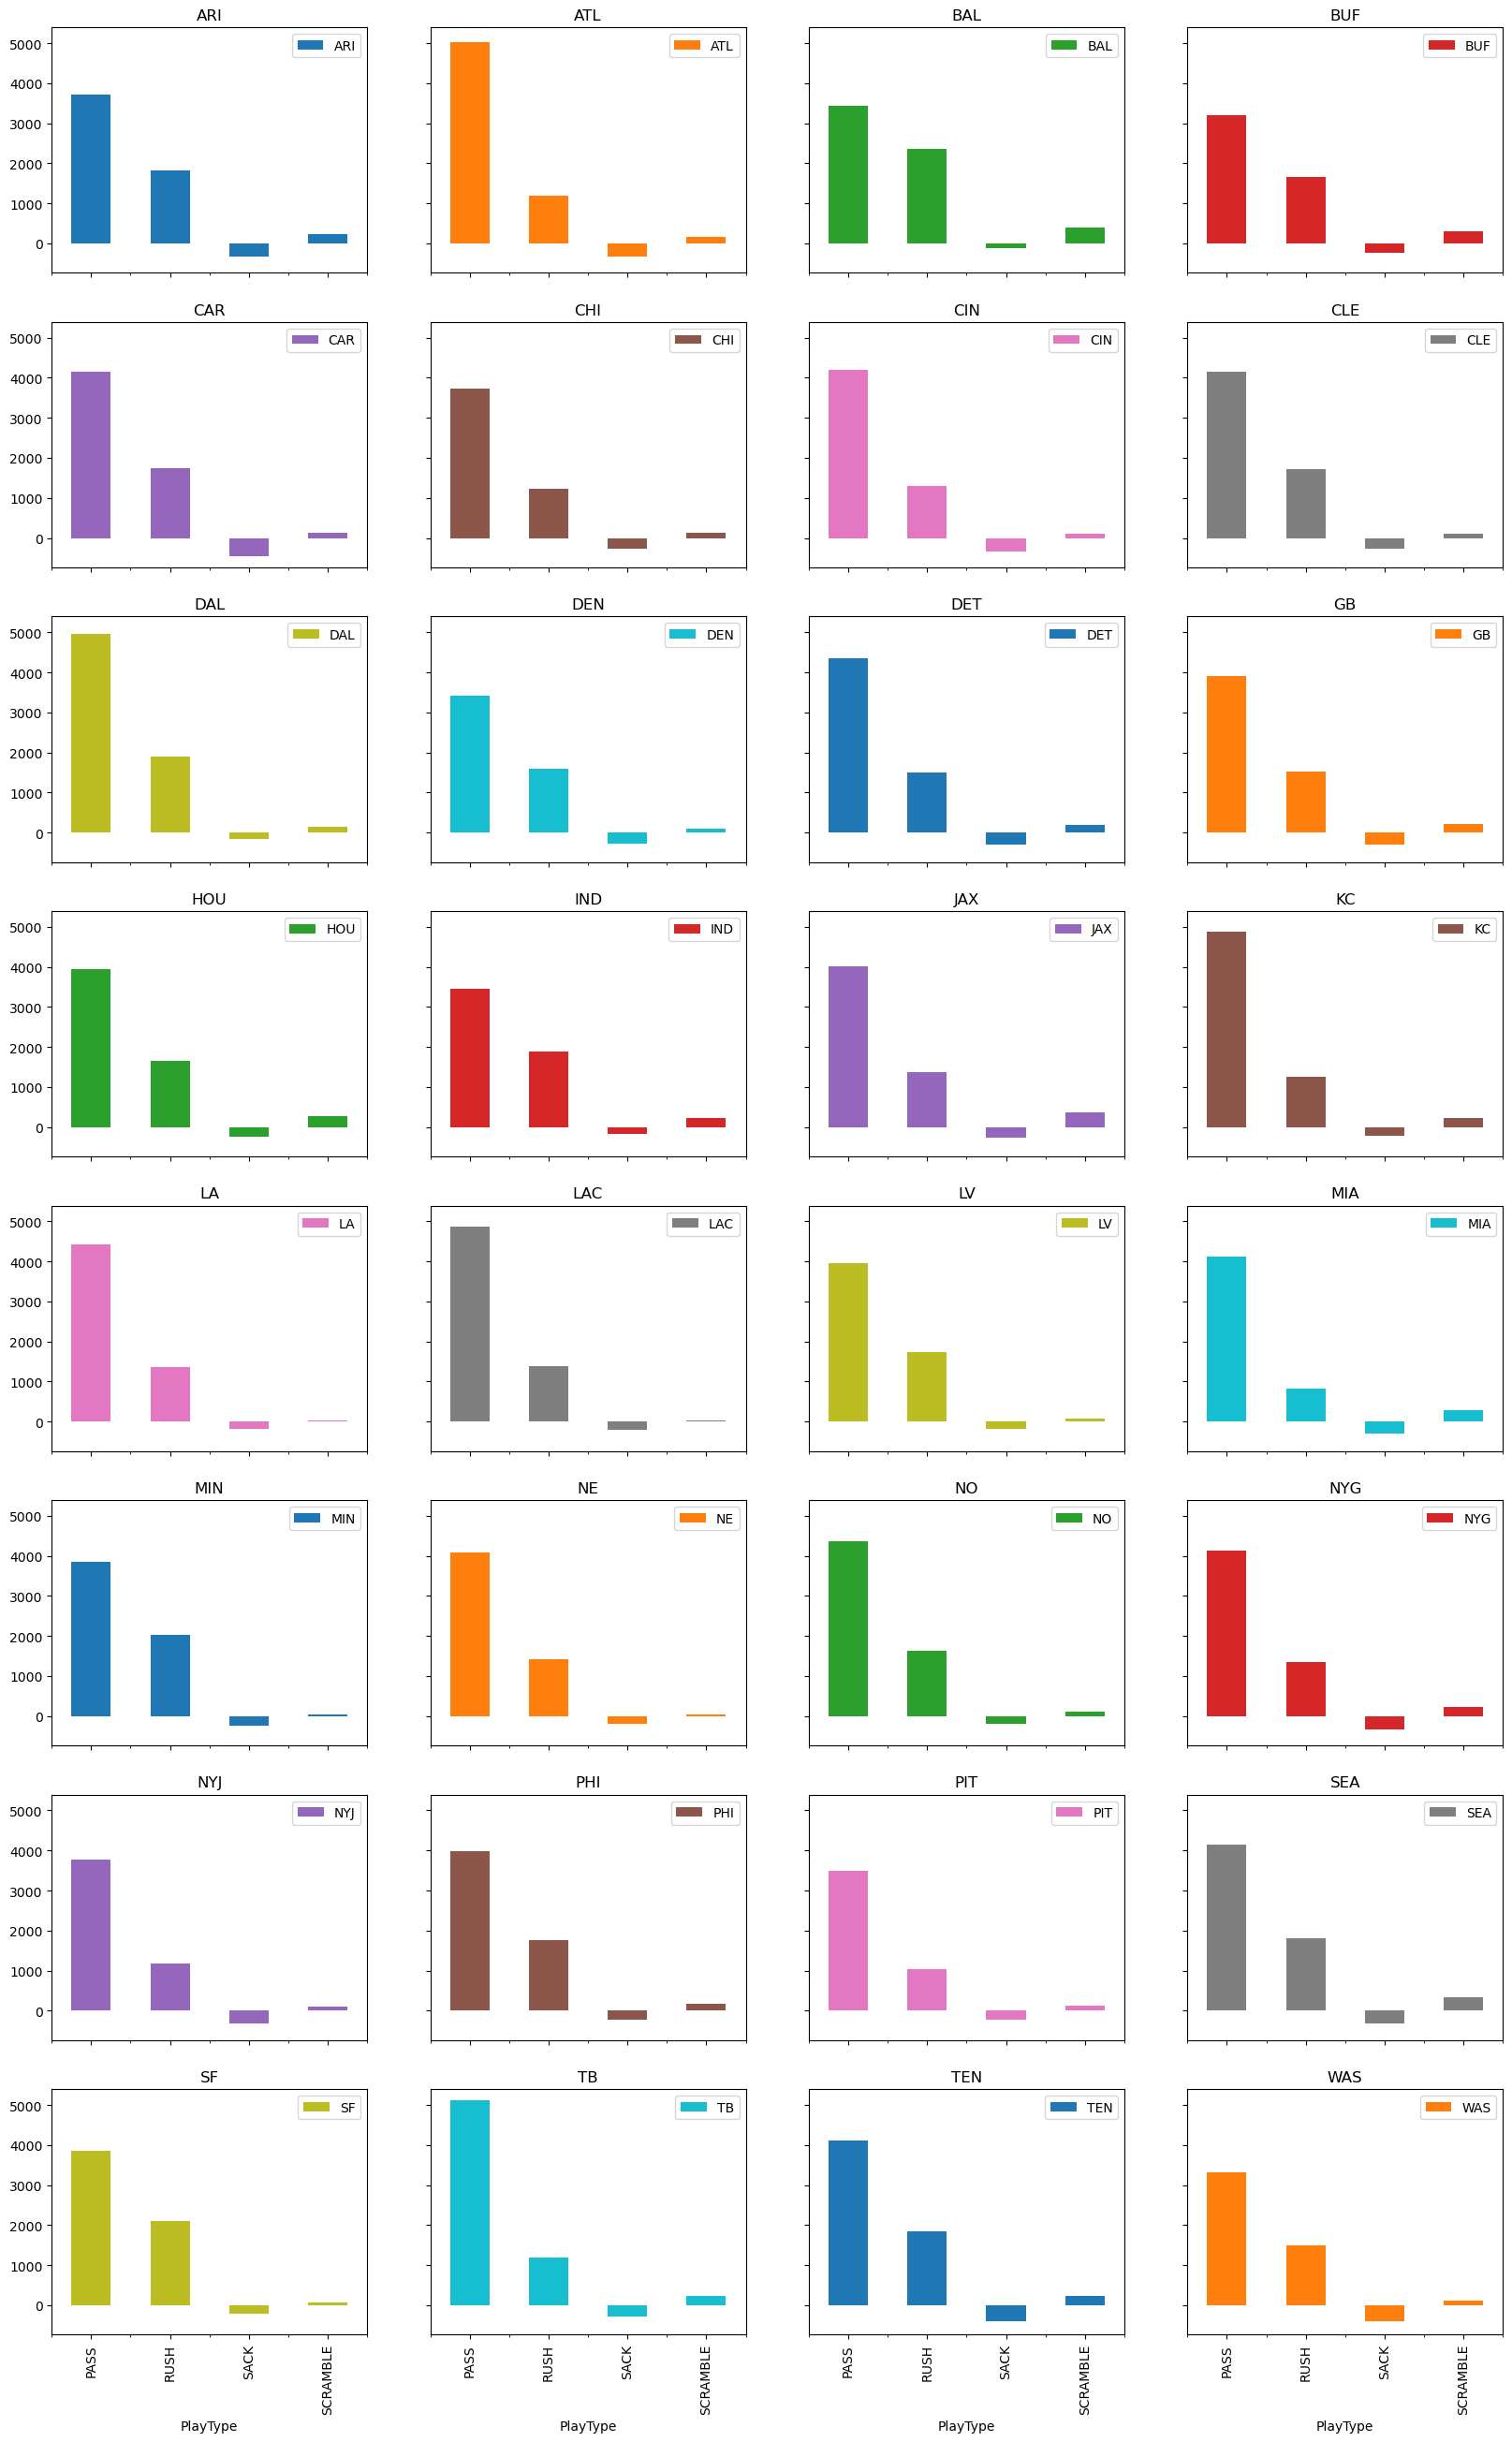

In [6]:
# This first visualization was to see all 32 teams at once and see their offenvise yardage

pivot_table = pd.pivot_table(df.reset_index(), index='PlayType', columns='OffenseTeam', values='Yards', aggfunc='sum')
pivot_table.plot(subplots=True, layout=(8,4), figsize=(20,32), kind='bar', sharex=True, sharey=True)
print(pivot_table)

PlayType   PASS   RUSH  SACK  SCRAMBLE
Month                                 
Dec       31276  12244 -1829      1264
Nov       31010  11512 -2268      1504
Oct       32098  12592 -2141      1434
Sep       35832  13477 -2259      1341


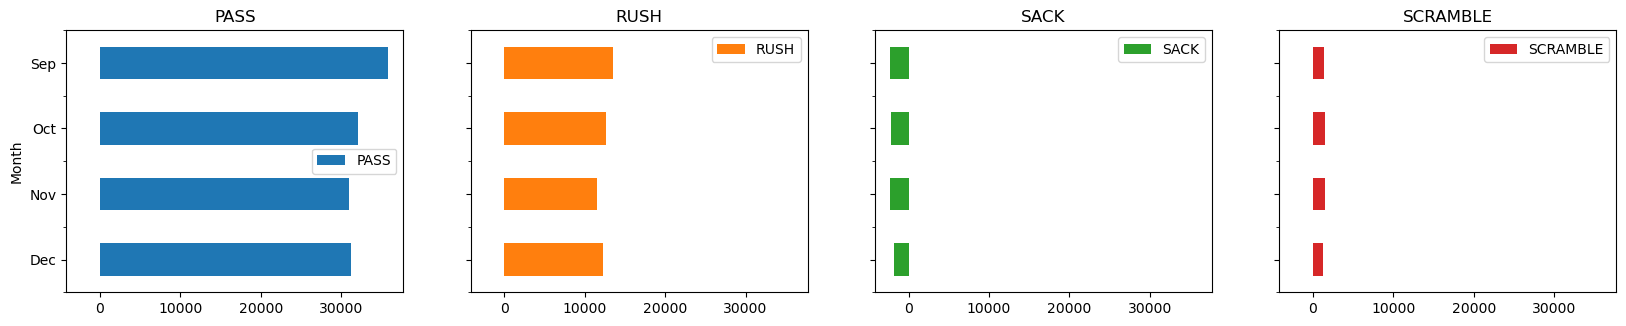

In [7]:
# Similar table as above, I wanted to see by month how the four major plays stacked up. Predicatably, more passing and rushing early in the season. 
# Less so as injuries and weather become more of a factor later in the season.

pivot_table = pd.pivot_table(df.reset_index(), index='Month', columns='PlayType', values='Yards', aggfunc='sum')
pivot_table.plot(subplots=True, layout=(8,4), figsize=(20,32), kind='barh', sharex=True, sharey=True)
print(pivot_table)

Month       Dec    Nov    Oct    Sep
PlayType                            
PASS      31276  31010  32098  35832
RUSH      12244  11512  12592  13477
SACK      -1829  -2268  -2141  -2259
SCRAMBLE   1264   1504   1434   1341


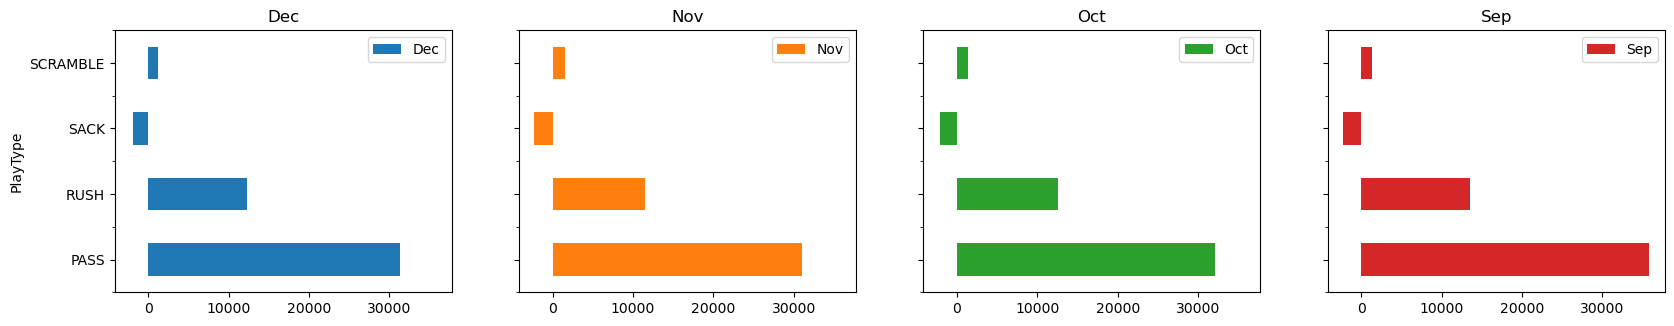

In [8]:
# Swapped the months and playtype from above

pivot_table = pd.pivot_table(df.reset_index(), index='PlayType', columns='Month', values='Yards', aggfunc='sum')
pivot_table.plot(subplots=True, layout=(8,4), figsize=(20,32), kind='barh', sharex=True, sharey=True)
print(pivot_table)

Down           1       2      3      4
PlayType                              
PASS      1642.0  1348.0  984.0  234.0
RUSH       737.0   478.0   64.0   12.0
SACK      -108.0  -100.0 -115.0   -8.0
SCRAMBLE    82.0    10.0   22.0    NaN


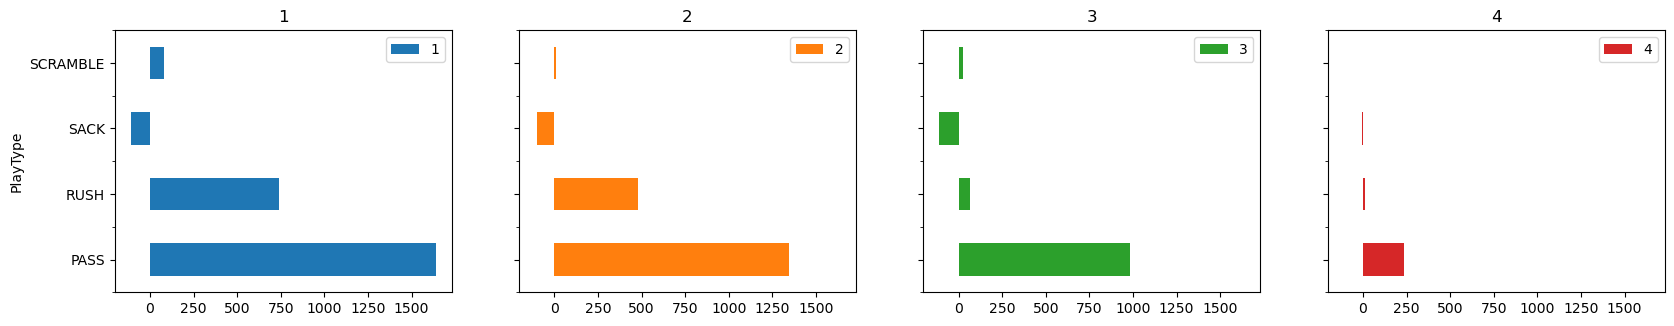

In [9]:
# What was the total yardage for the season for the worst team - Cincinnati Bengals? 2-14 record

filteredCIN_df = df[(df['OffenseTeam'] == 'CIN')]
pivot_table = pd.pivot_table(filteredCIN_df.reset_index(), index='PlayType', columns='Down', values='Yards', aggfunc='sum')
pivot_table.plot(subplots=True, layout=(8,4), figsize=(20,32), kind='barh', sharex=True, sharey=True)
print(pivot_table)

Down           1       2      3      4
PlayType                              
PASS      1276.0  1181.0  850.0  119.0
RUSH      1237.0   829.0  204.0   82.0
SACK       -29.0   -59.0  -28.0    NaN
SCRAMBLE    72.0   136.0  184.0    7.0


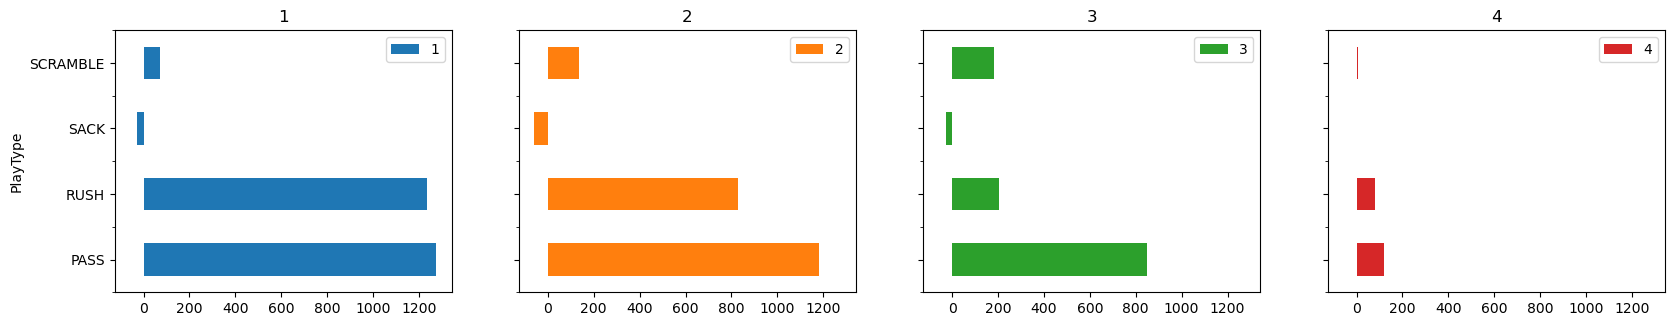

In [10]:
# What was the total yardage for the season for the best team - Baltimore Ravens? 14-2 record

filteredBAL_df = df[(df['OffenseTeam'] == 'BAL')]
pivot_table = pd.pivot_table(filteredBAL_df.reset_index(), index='PlayType', columns='Down', values='Yards', aggfunc='sum')
pivot_table.plot(subplots=True, layout=(8,4), figsize=(20,32), kind='barh', sharex=True, sharey=True)
print(pivot_table)

In [11]:
# Created dataframes to compare games that were played on different days of the week

filteredTHU_df = df[(df['DayOfWeek'] == 'Thu')]
filteredSUN_df = df[(df['DayOfWeek'] == 'Sun')]
filteredMON_df = df[(df['DayOfWeek'] == 'Mon')]

dayyardsTHU = filteredTHU_df.groupby(['OffenseTeam'])['Yards'].sum().reset_index().rename(columns={"index": "Team", 0: "Yards"})

dayyardsSUN = filteredSUN_df.groupby(['OffenseTeam'])['Yards'].sum().reset_index().rename(columns={"index": "Team", 0: "Yards"})
dayyardsSUND = filteredSUN_df.groupby(['DefenseTeam'])['Yards'].sum().reset_index().rename(columns={"index": "Team", 0: "Yards"})

dayyardsMON = filteredMON_df.groupby(['OffenseTeam'])['Yards'].sum().reset_index().rename(columns={"index": "Team", 0: "Yards"})


<Axes: xlabel='OffenseTeam'>

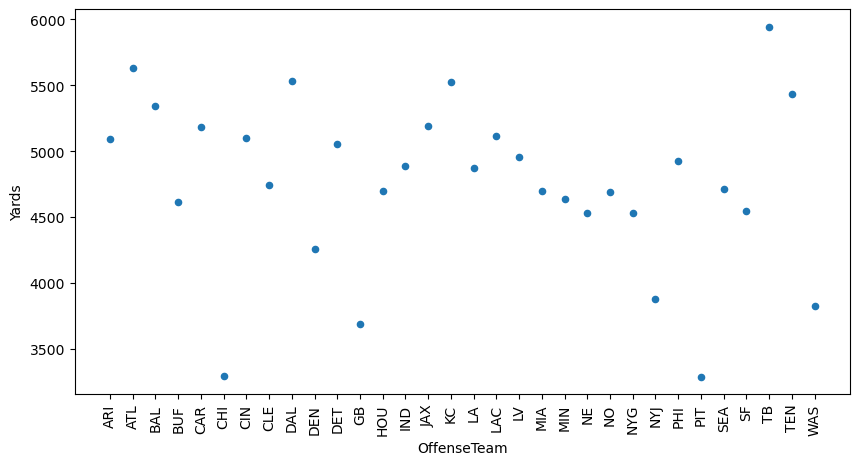

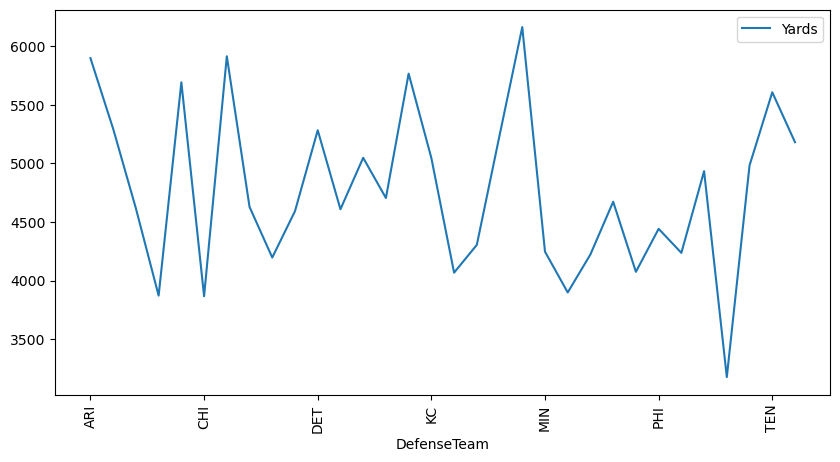

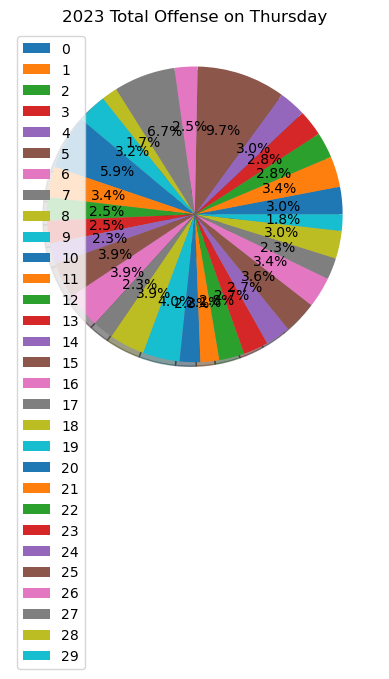

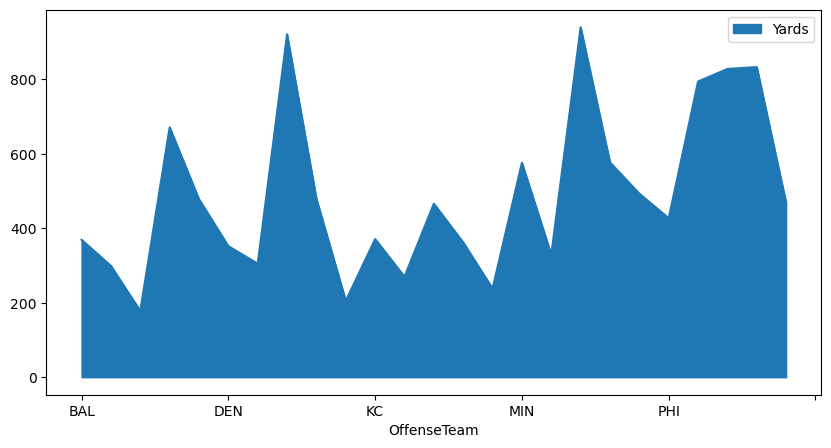

In [12]:
# Created a scatter plot, a line graph, a pie chart, and an area chart. There are too many items (32 teams) for the pie chart to be effective.

dayyardsSUN.plot.scatter(x="OffenseTeam", y='Yards', figsize=(10,5))
plt.xticks(rotation = 90)

dayyardsSUND.plot(x='DefenseTeam', y='Yards', figsize=(10,5))
plt.xticks(rotation = 90)

dayyardsTHU.plot.pie(x='OffenseTeam', y='Yards', autopct='%1.1f%%', shadow=True, legend=True, title='2023 Total Offense on Thursday', ylabel='', labeldistance=None)


dayyardsMON.plot.area(x='OffenseTeam', y='Yards', figsize=(10,5))
